In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from skimage.morphology import medial_axis

In [2]:
# 2値画像読み込み
from PIL import Image

def load_gray_image(fname='./noisy.png'):
    im = Image.open(fname)
    gray_im = im.convert('L')
    
    arr = np.asarray(gray_im)
    return arr

In [3]:
def plot_array(arr, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.imshow(arr, cmap='Greys',  interpolation='nearest')
    plt.axis('on')
    plt.show()

In [4]:
from skimage.filters import threshold_mean

def binalization(image):
    thresh = threshold_mean(image)
    binary = image > thresh

    return binary


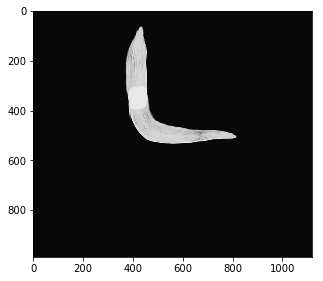

In [5]:
# gray scale image
data = load_gray_image()
plot_array(data)

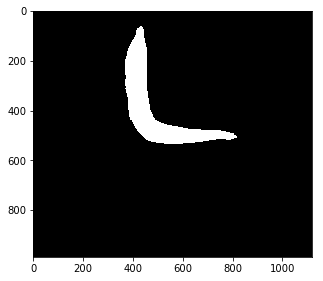

In [6]:
# binalization without denoising
data_binary = binalization(data)
plot_array(data_binary)

In [7]:
from skimage.restoration import denoise_tv_chambolle
denoised = denoise_tv_chambolle(data, weight=0.2, multichannel=True)

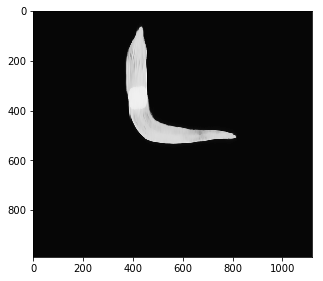

In [8]:
plot_array(denoised)

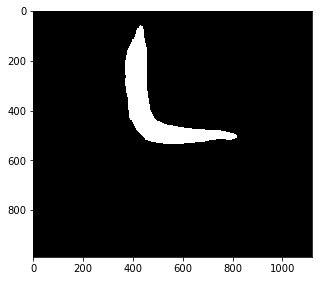

In [9]:
# binalization with denoising
denoised_binary = binalization(denoised)
plot_array(denoised_binary)